# Data Set: **Análisis de Impagos - Banco de Taiwan**

**Integrantes**:

* Angie Tatiana Aparicio Ochoa
* Jhon Brandon Idarraga
* Jhonn Sebastian Robles
* Harold Muñoz

# PARTE 1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y LA NATURALEZA DEL DATASET


![alt text](https://drive.google.com/uc?id=1xU_ccd5ZtjfT7M9OiqT0rYZBKbvCORuI)

![alt text](https://drive.google.com/uc?id=1XmOFiZGo7YBhznQ0vq-UykuFfjYc9hCc)

![alt text](https://drive.google.com/uc?id=1yI5XM1aWzjk1JDczzBpzgLGmsgPDBLxH)

# IMPORTAR LIBRERÍAS Y DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Conectarlo al Drive de Google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Tienes que incluir el enlace completo al archivo csv que contiene el conjunto de datos

creditcard_df = pd.read_csv('/content/sample_data/UCI_Credit_Card_Taiwan.csv')


In [4]:
# Vista previa del DataSet (Primeros y ultimos registros)
creditcard_df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [5]:
# Información de la naturaleza de los campos y si existen nulos (que no los hay)

creditcard_df.info()
# 24 características en total, cada una con describiendo un total de 30000 puntos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
creditcard_df.describe()
# la media de LIMIT_BAL = 15000, min = 1 y max = 30000
# la media de EDAD = 35 años, mínimo = 21 y máximo = 79
# El promedio de PAY_AMT es de alrededor de 5000

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

# VISUALIZAR EL DATASET

<Axes: >

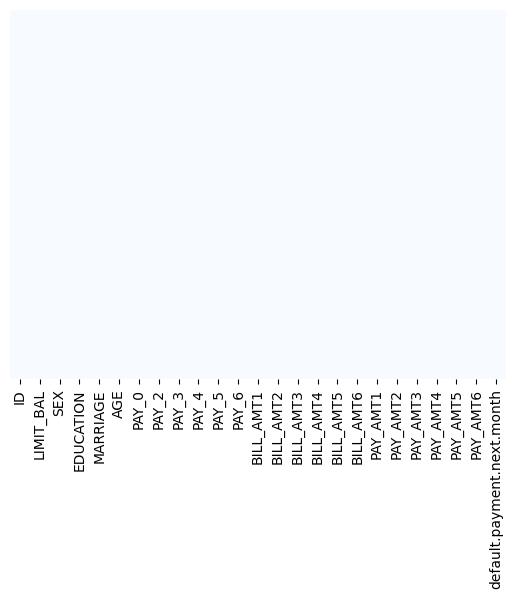

In [7]:
# Veamos si nos faltan datos, ¡afortunadamente NO!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

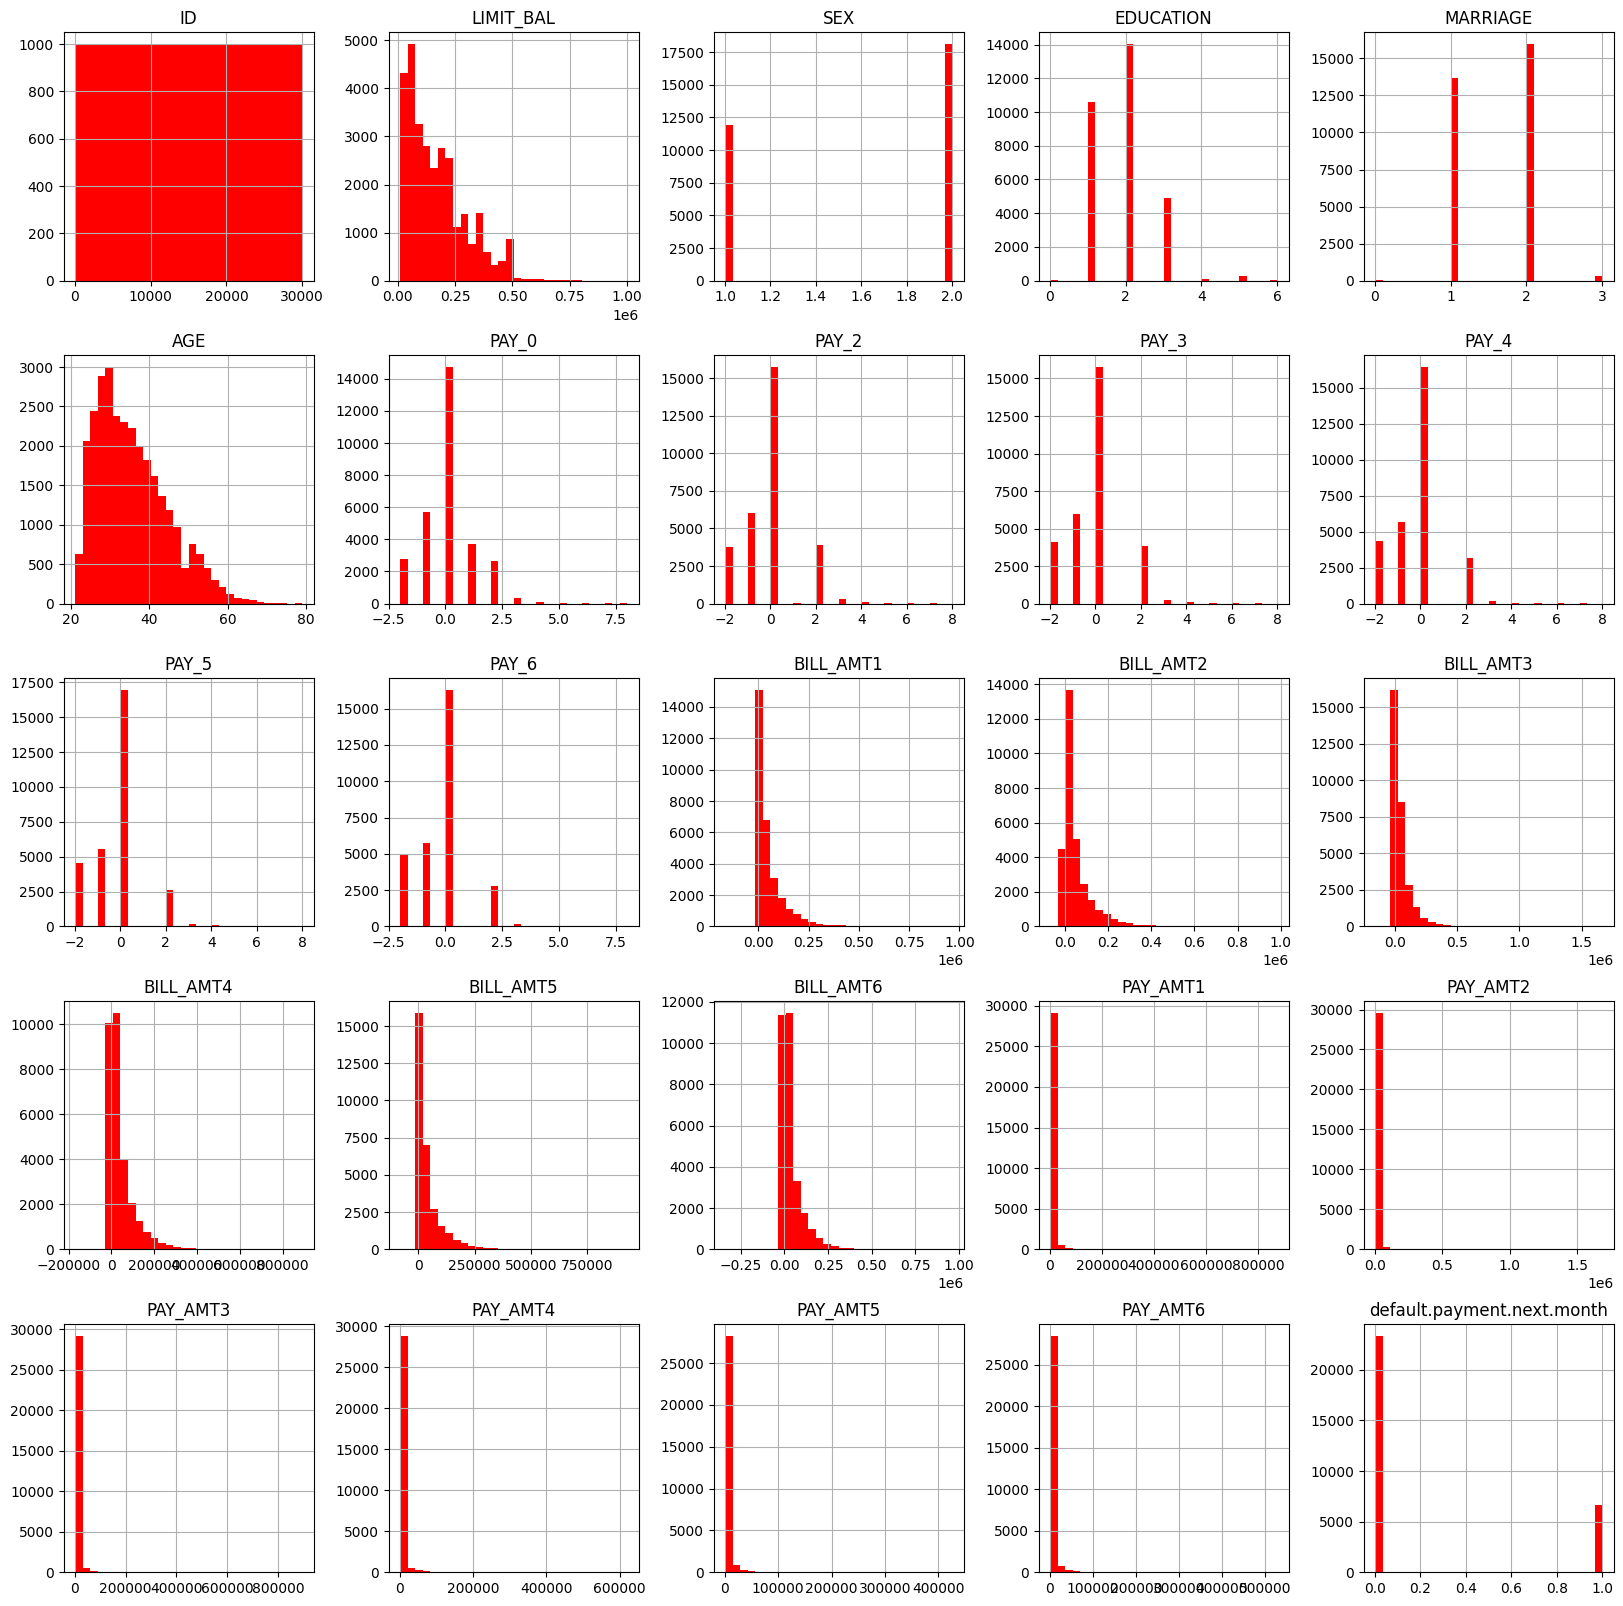

In [8]:
creditcard_df.hist(bins = 30, figsize = (20,20), color = 'r')


In [9]:
# Vamos a eliminar la columna con el ID porque claramente no proporciona minguna informacion impoprtante (ver diagrama anterior)

creditcard_df.drop(['ID'], axis=1, inplace=True)

In [10]:
creditcard_df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

In [11]:
# ¡Veamos cuántos clientes podrían incumplir con el pago con tarjeta de crédito!
cc_default_df        = creditcard_df[creditcard_df['default.payment.next.month'] == 1]
cc_nodefault_df      = creditcard_df[creditcard_df['default.payment.next.month'] == 0]


In [12]:
# Contamos el número de clientes que se quedaron y se fueron
# Parece que estamos ante un conjunto de datos desbalanceado

print("Total =", len(creditcard_df))

print("Número de clientes que incumplieron sus pagos con tarjeta de crédito =", len(cc_default_df))
print("Porcentaje de clientes que incumplieron sus pagos con tarjeta de crédito =", 1.*len(cc_default_df)/len(creditcard_df)*100.0, "%")

print("Número de clientes que cumplieron sus pagos con tarjeta de crédito (pagan la deuda) =", len(cc_nodefault_df))
print("Porcentaje de clientes que cumplieron sus pagos con tarjeta de crédito (pagan la deuda) =", 1.*len(cc_nodefault_df)/len(creditcard_df)*100.0, "%")

Total = 30000
Número de clientes que incumplieron sus pagos con tarjeta de crédito = 6636
Porcentaje de clientes que incumplieron sus pagos con tarjeta de crédito = 22.12 %
Número de clientes que cumplieron sus pagos con tarjeta de crédito (pagan la deuda) = 23364
Porcentaje de clientes que cumplieron sus pagos con tarjeta de crédito (pagan la deuda) = 77.88000000000001 %


In [13]:
# Comparemos la media y el error estándar de los clientes que cumplen y los que no
cc_default_df.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    6636.000000  6636.000000  6636.000000  6636.000000  6636.000000   
mean   130109.656420     1.567058     1.894665     1.528029    35.725738   
std    115378.540571     0.495520     0.728096     0.525433     9.693438   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%     90000.000000     2.000000     2.000000     2.000000    34.000000   
75%    200000.000000     2.000000     2.000000     2.000000    42.000000   
max    740000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  6636.000000  6636.000000  6636.000000  6636.000000  6636.000000  ...   
mean      0.668174     0.458258     0.362116     0.254521     0.167872  ...   
std       1.383252     1.502243     1.499401     1.508535     1.482833  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%       0.000000     0.000000    -1.000000    -1.000000    -1.000000  ...   
50%       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       2.000000     2.000000     2.000000     2.000000     0.000000  ...   
max       8.000000     7.000000     8.000000     8.000000     8.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    6636.000000    6636.000000    6636.000000    6636.000000   
mean    42036.950573   39540.190476   38271.435503    3397.044153   
std     64351.076092   61424.695949   59579.674268    9544.252427   
min    -65167.000000  -53007.000000 -339603.000000       0.000000   
25%      2141.500000    1502.750000    1150.000000       0.000000   
50%     19119.500000   18478.500000   18028.500000    1636.000000   
75%     50175.750000   47853.000000   47424.000000    3478.250000   
max    548020.000000  547880.000000  514975.000000  300000.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    6636.000000    6636.000000    6636.000000    6636.000000   
mean     3388.649638    3367.351567    3155.626733    3219.139542   
std     11737.986064   12959.624486   11191.973162   11944.731175   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%      1533.500000    1222.000000    1000.000000    1000.000000   
75%      3309.750000    3000.000000    2939.250000    3000.000000   
max    358689.000000  508229.000000  432130.000000  332000.000000   

            PAY_AMT6  default.payment.next.month  
count    6636.000000                      6636.0  
mean     3441.482068                         1.0  
std     13464.005894                         0.0  
min         0.000000                         1.0  
25%         0.000000                         1.0  
50%      1000.000000                         1.0  
75%      2974.500000                         1.0  
max    345293.000000                         1.0  

[8 rows x 24 columns]

In [14]:
# Comparemos la media y el error estándar de los clientes que cumplen y los que no
cc_nodefault_df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    23364.000000  23364.000000  23364.000000  23364.000000  23364.000000   
mean    178099.726074      1.614150      1.841337      1.558637     35.417266   
std     131628.359660      0.486806      0.806780      0.520794      9.077355   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      70000.000000      1.000000      1.000000      1.000000     28.000000   
50%     150000.000000      2.000000      2.000000      2.000000     34.000000   
75%     250000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  23364.000000  23364.000000  23364.000000  23364.000000  23364.000000   
mean      -0.211222     -0.301917     -0.316256     -0.355633     -0.389488   
std        0.952464      1.035191      1.048378      1.013162      0.977591   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      7.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   23364.000000   23364.000000   23364.000000   23364.000000   
mean   ...   43611.165254   40530.445343   39042.268704    6307.337357   
std    ...   64324.796730   60617.268112   59547.015717   18014.508990   
min    ... -170000.000000  -81334.000000 -209051.000000       0.000000   
25%    ...    2360.000000    1823.000000    1265.500000    1163.750000   
50%    ...   19000.000000   17998.000000   16679.000000    2459.500000   
75%    ...   55988.000000   51135.250000   49842.500000    5606.250000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.336400e+04   23364.000000   23364.000000   23364.000000   
mean   6.640465e+03    5753.496833    5300.529319    5248.220296   
std    2.530226e+04   18684.255937   16689.778060   16071.667860   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.005000e+03     600.000000     390.000000     369.000000   
50%    2.247500e+03    2000.000000    1734.000000    1765.000000   
75%    5.311250e+03    5000.000000    4602.000000    4600.000000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   23364.000000                     23364.0  
mean     5719.371769                         0.0  
std     18792.950473                         0.0  
min         0.000000                         0.0  
25%       300.000000                         0.0  
50%      1706.000000                         0.0  
75%      4545.000000                         0.0  
max    528666.000000                         0.0  

[8 rows x 24 columns]

<Axes: >

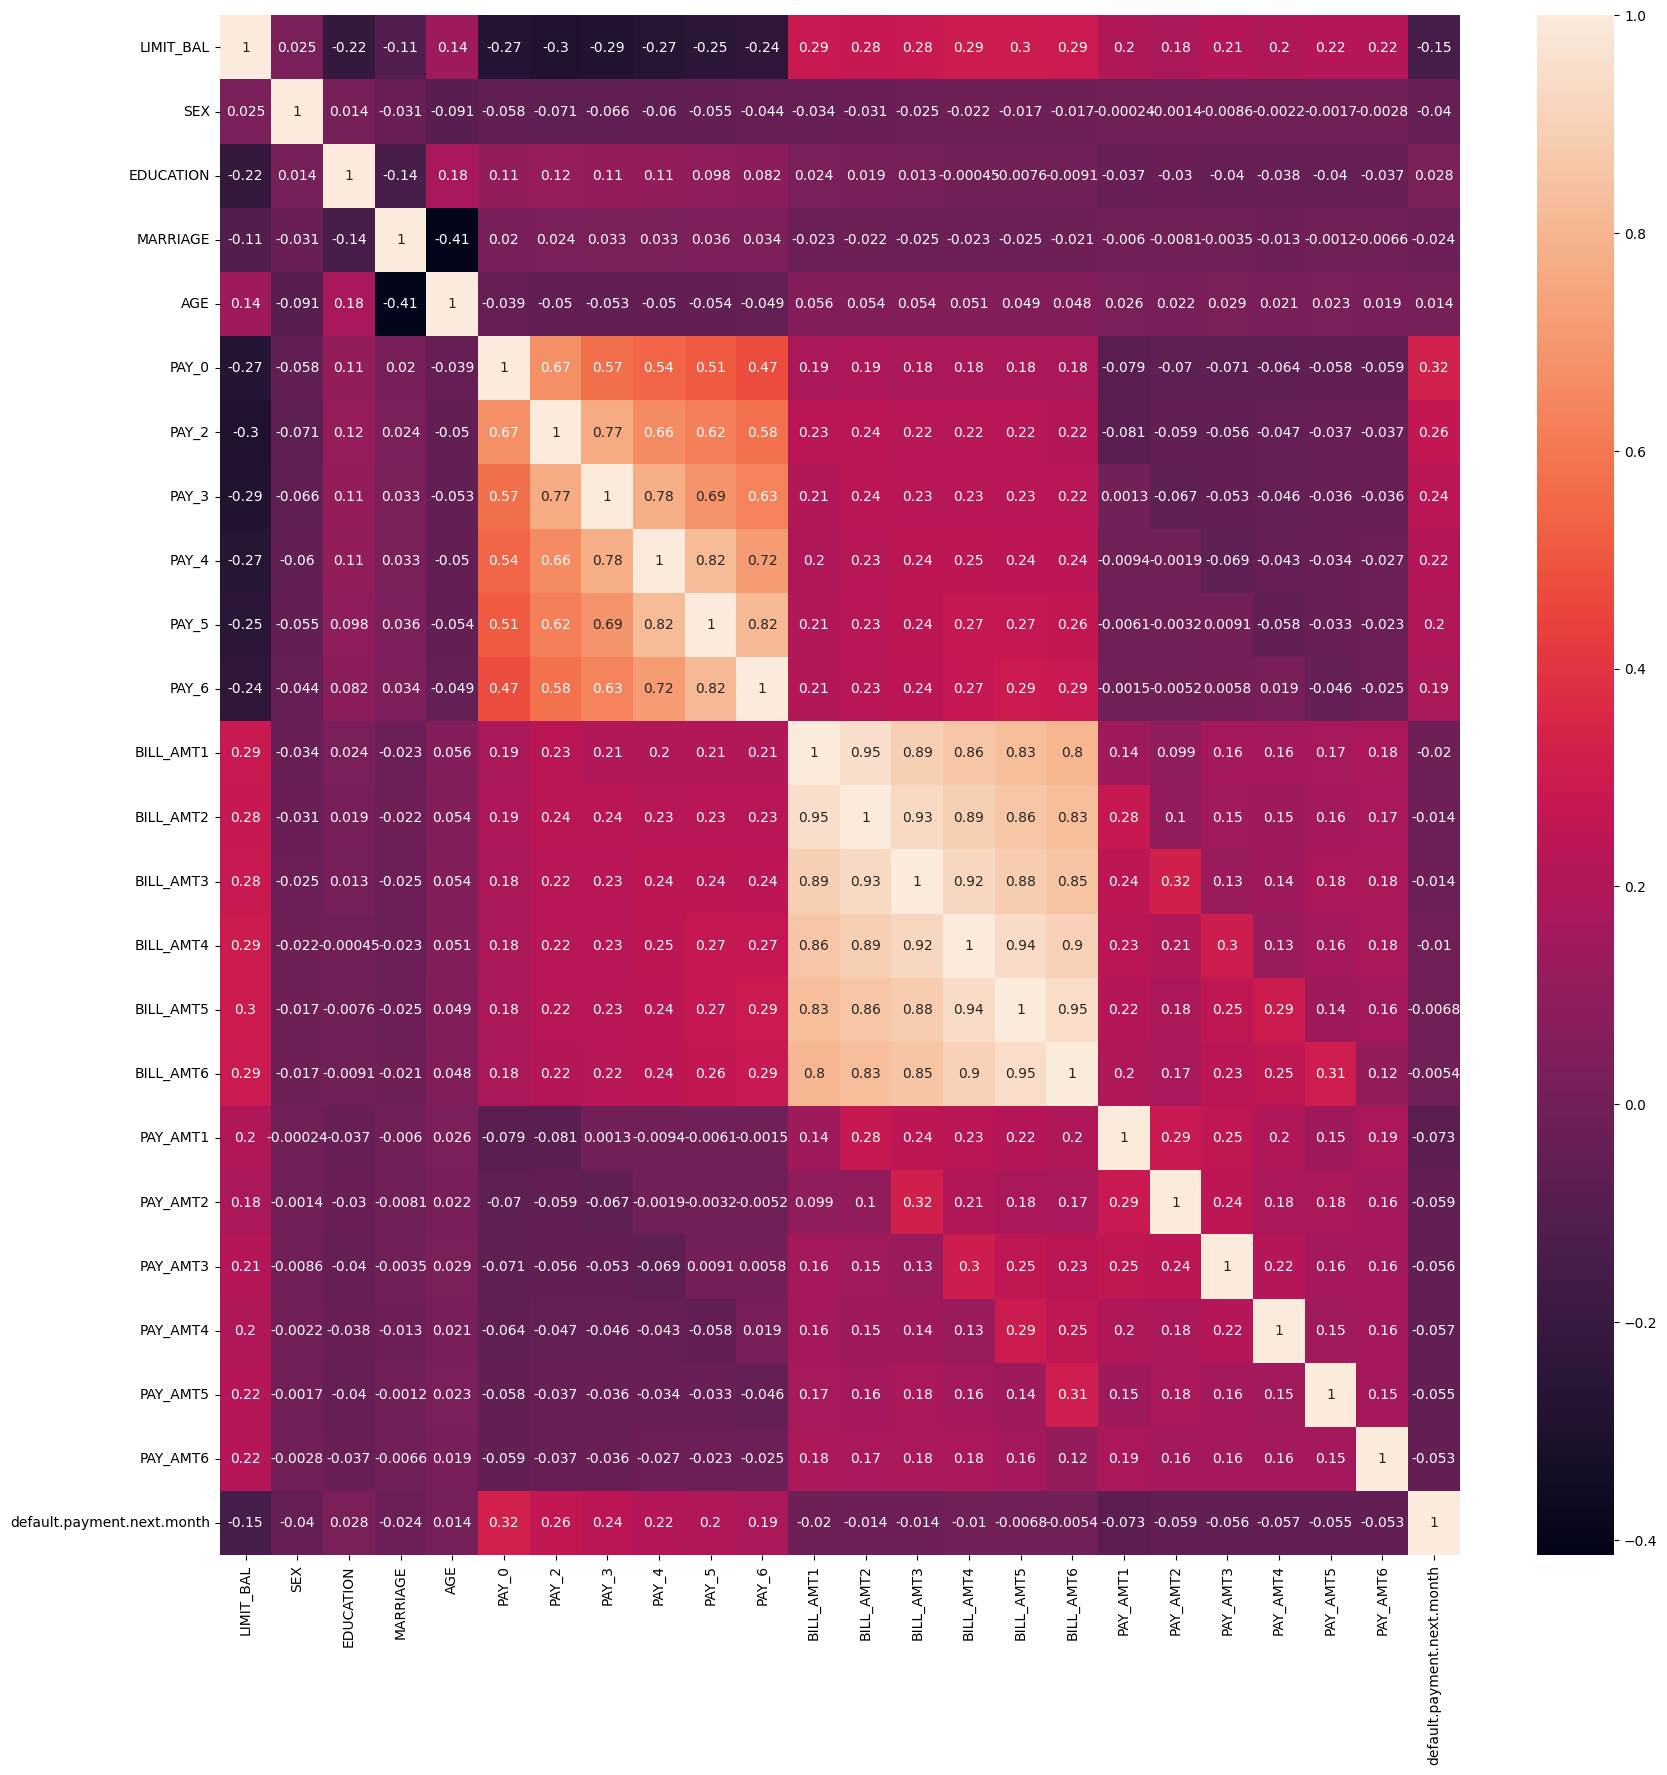

In [15]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)


<Axes: xlabel='AGE', ylabel='count'>

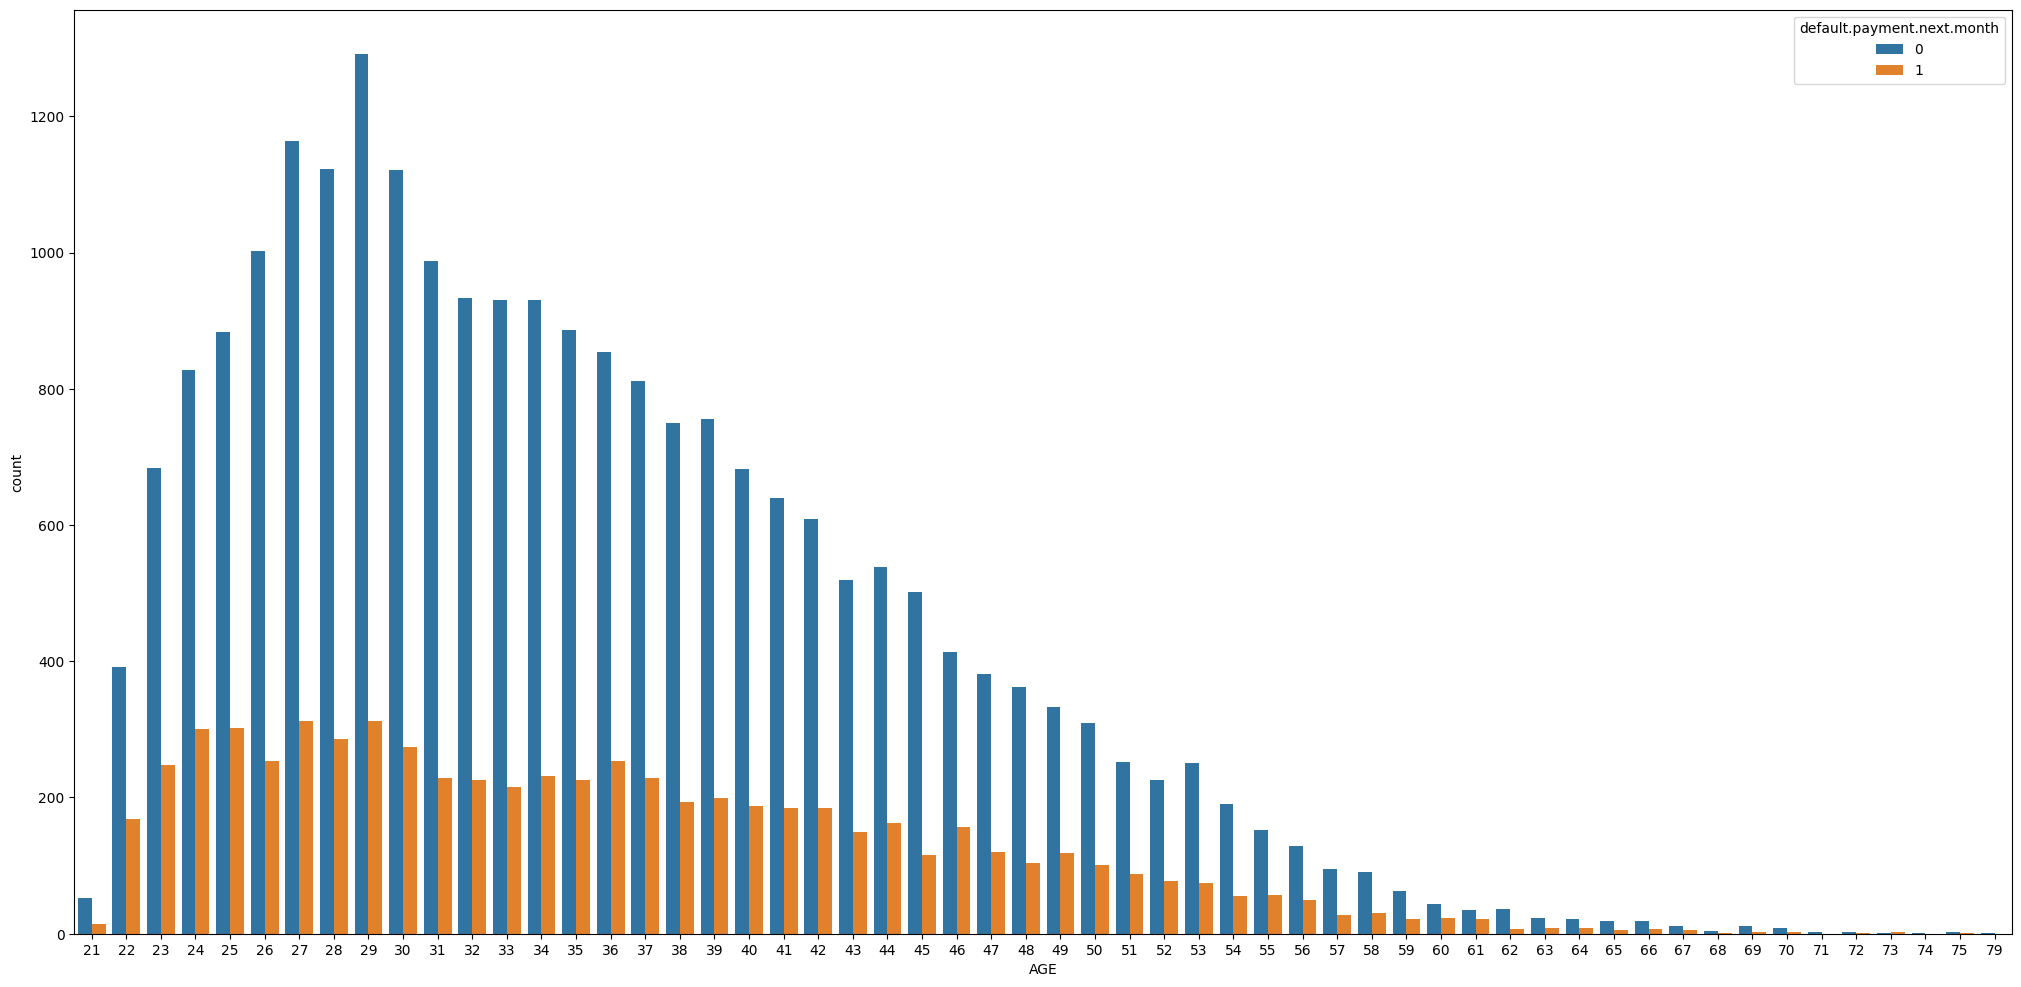

In [ ]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = creditcard_df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

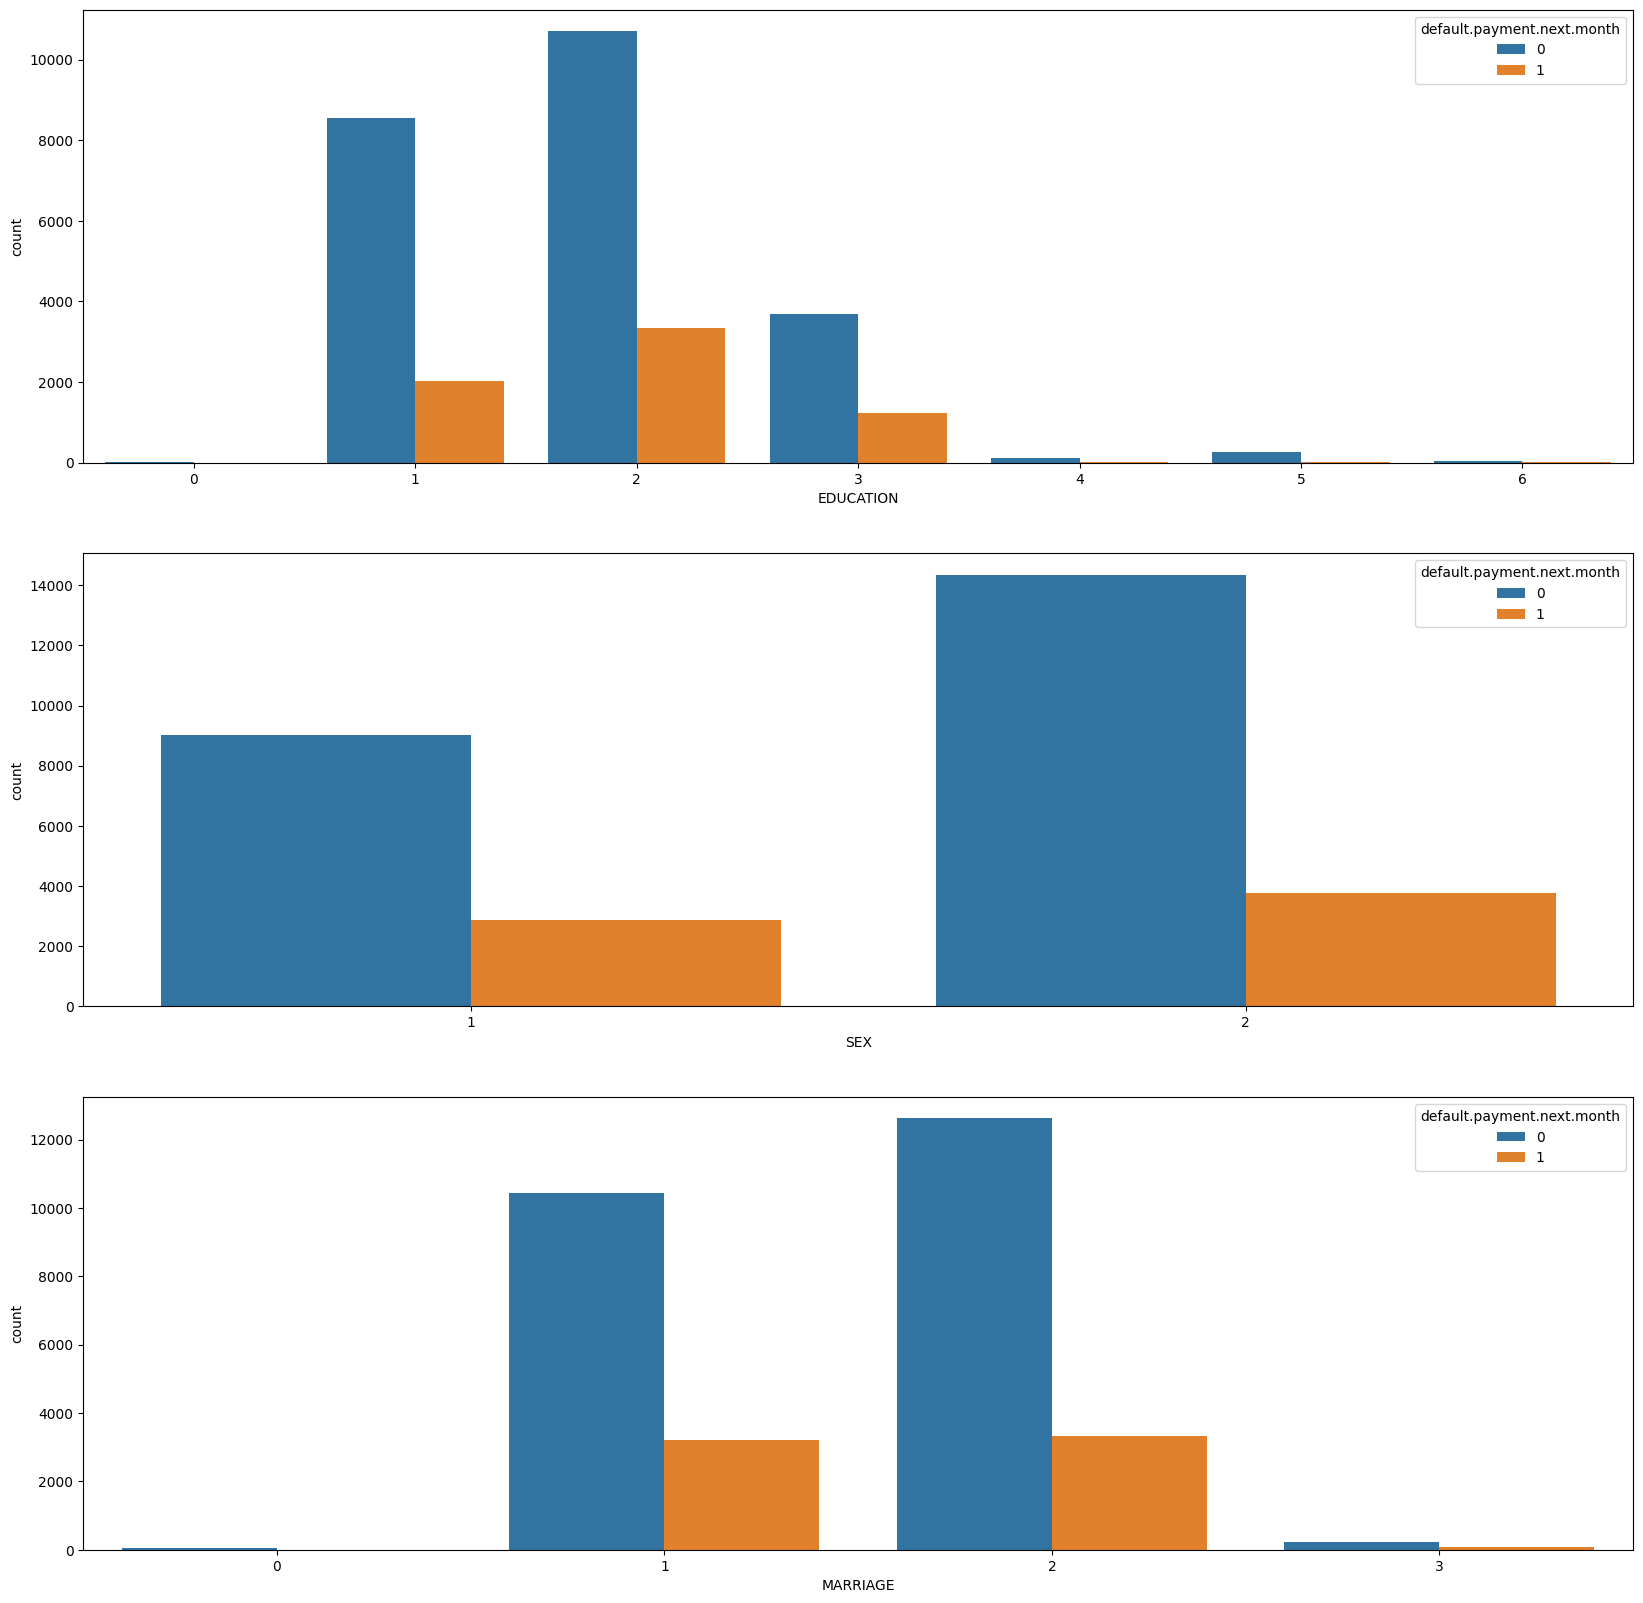

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = creditcard_df)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = creditcard_df)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = creditcard_df)


<ipython-input-21-159436bfdac2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cc_nodefault_df['LIMIT_BAL'], bins = 250, color = 'r')
<ipython-input-21-159436bfdac2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cc_default_df['LIMIT_BAL'], bins = 250, color = 'b')


Text(0.5, 0, 'Cantidad que debe en cuenta a septiembre de 2005 (dólar NT)')

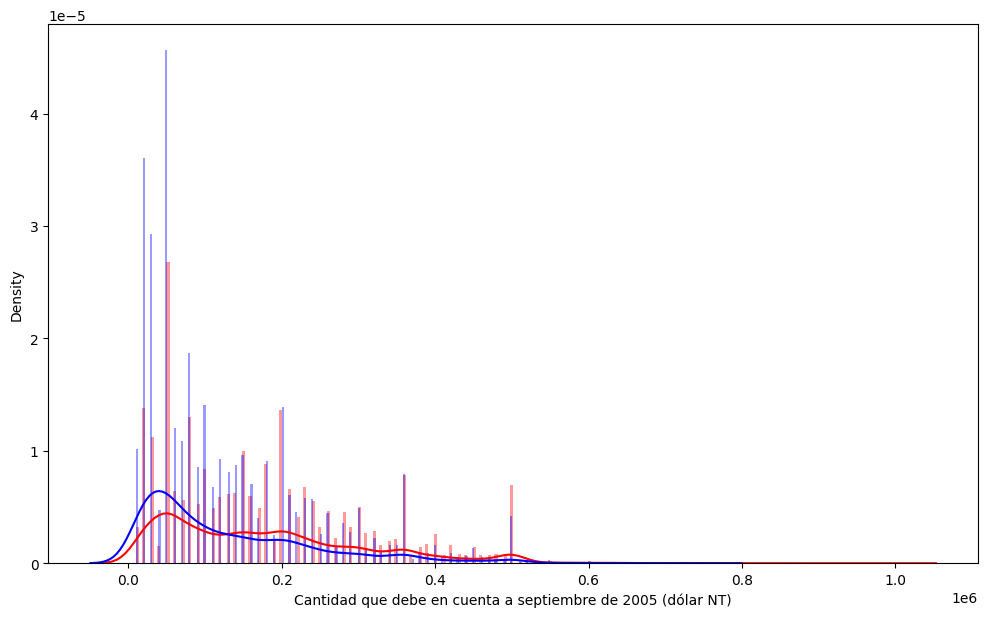

In [ ]:
# KDE (Kernel Density Estimate) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad a diferentes valores en una variable continua.

plt.figure(figsize=(12,7))

sns.distplot(cc_nodefault_df['LIMIT_BAL'], bins = 250, color = 'r')
sns.distplot(cc_default_df['LIMIT_BAL'], bins = 250, color = 'b')

plt.xlabel('Cantidad que debe en cuenta a septiembre de 2005 (dólar NT)')
#plt.xlim(0, 200000)


<ipython-input-22-e26b4b76410e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cc_nodefault_df['BILL_AMT1'], label = 'Clientes sin deudas (balance pagado)', shade = True, color = 'r')
<ipython-input-22-e26b4b76410e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cc_default_df['BILL_AMT1'], label = 'Clientes con deudas (balance sin pagar)', shade = True, color = 'b')


Text(0.5, 0, 'Cantidad que debe en cuenta a septiembre de 2005 (dólar NT)')

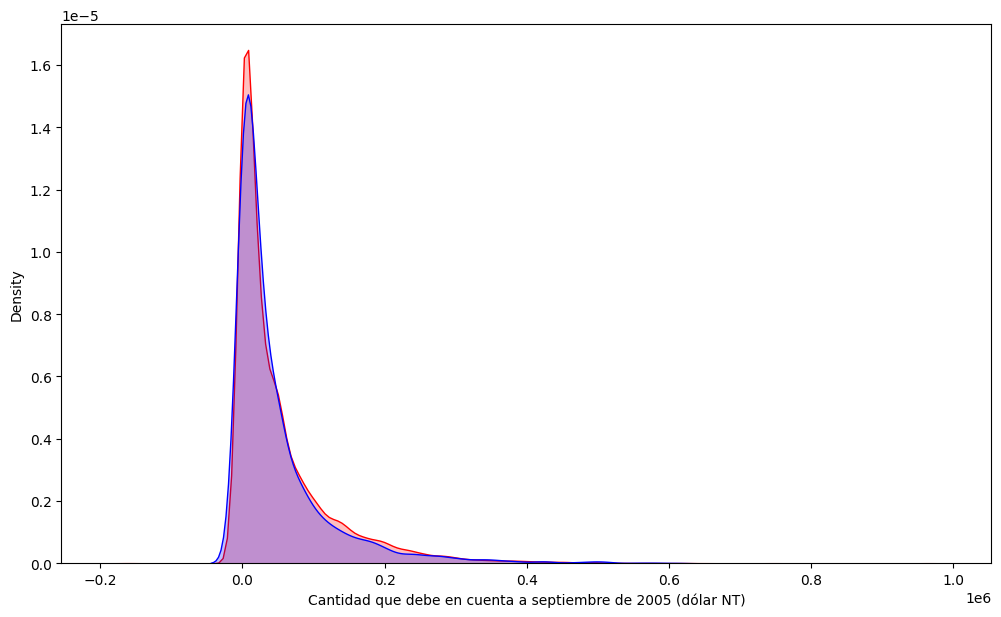

In [ ]:
# KDE (Kernel Density Estimate) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad a diferentes valores en una variable continua.

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['BILL_AMT1'], label = 'Clientes sin deudas (balance pagado)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['BILL_AMT1'], label = 'Clientes con deudas (balance sin pagar)', shade = True, color = 'b')

plt.xlabel('Cantidad que debe en cuenta a septiembre de 2005 (dólar NT)')
#plt.xlim(0, 200000)


<ipython-input-23-a29e5e06bbee>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cc_nodefault_df['PAY_AMT1'], label = 'Clientes sin deudas (balance pagado)', shade = True, color = 'r')
<ipython-input-23-a29e5e06bbee>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cc_default_df['PAY_AMT1'], label = 'Clientes con deudas (balance sin pagar)', shade = True, color = 'b')


(0.0, 200000.0)

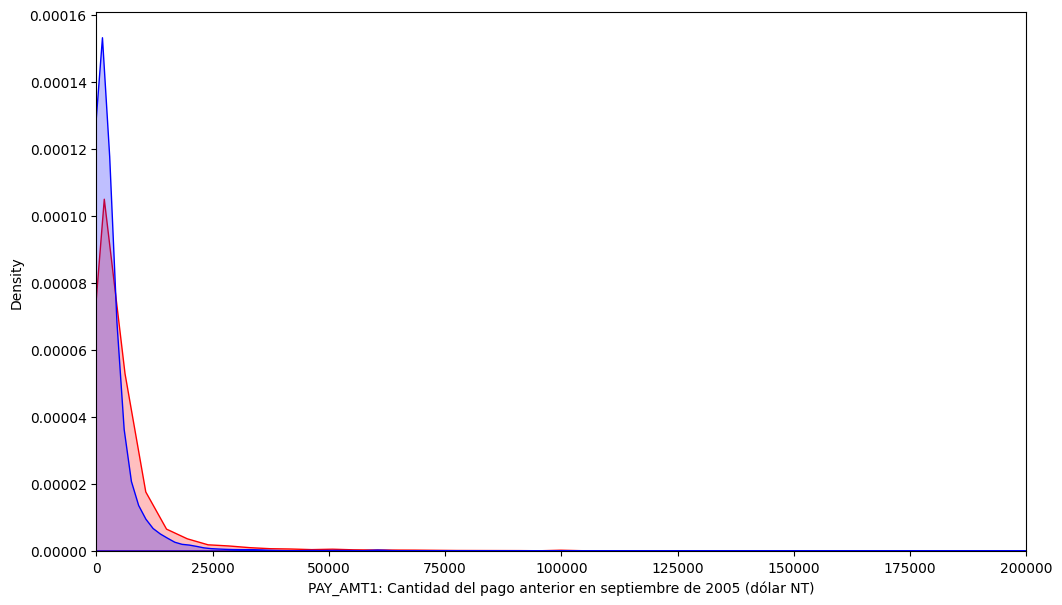

In [ ]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable.
# KDE describes the probability density at different values in a continuous variable.

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['PAY_AMT1'], label = 'Clientes sin deudas (balance pagado)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['PAY_AMT1'], label = 'Clientes con deudas (balance sin pagar)', shade = True, color = 'b')

plt.xlabel('PAY_AMT1: Cantidad del pago anterior en septiembre de 2005 (dólar NT)')
plt.xlim(0, 200000)


<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

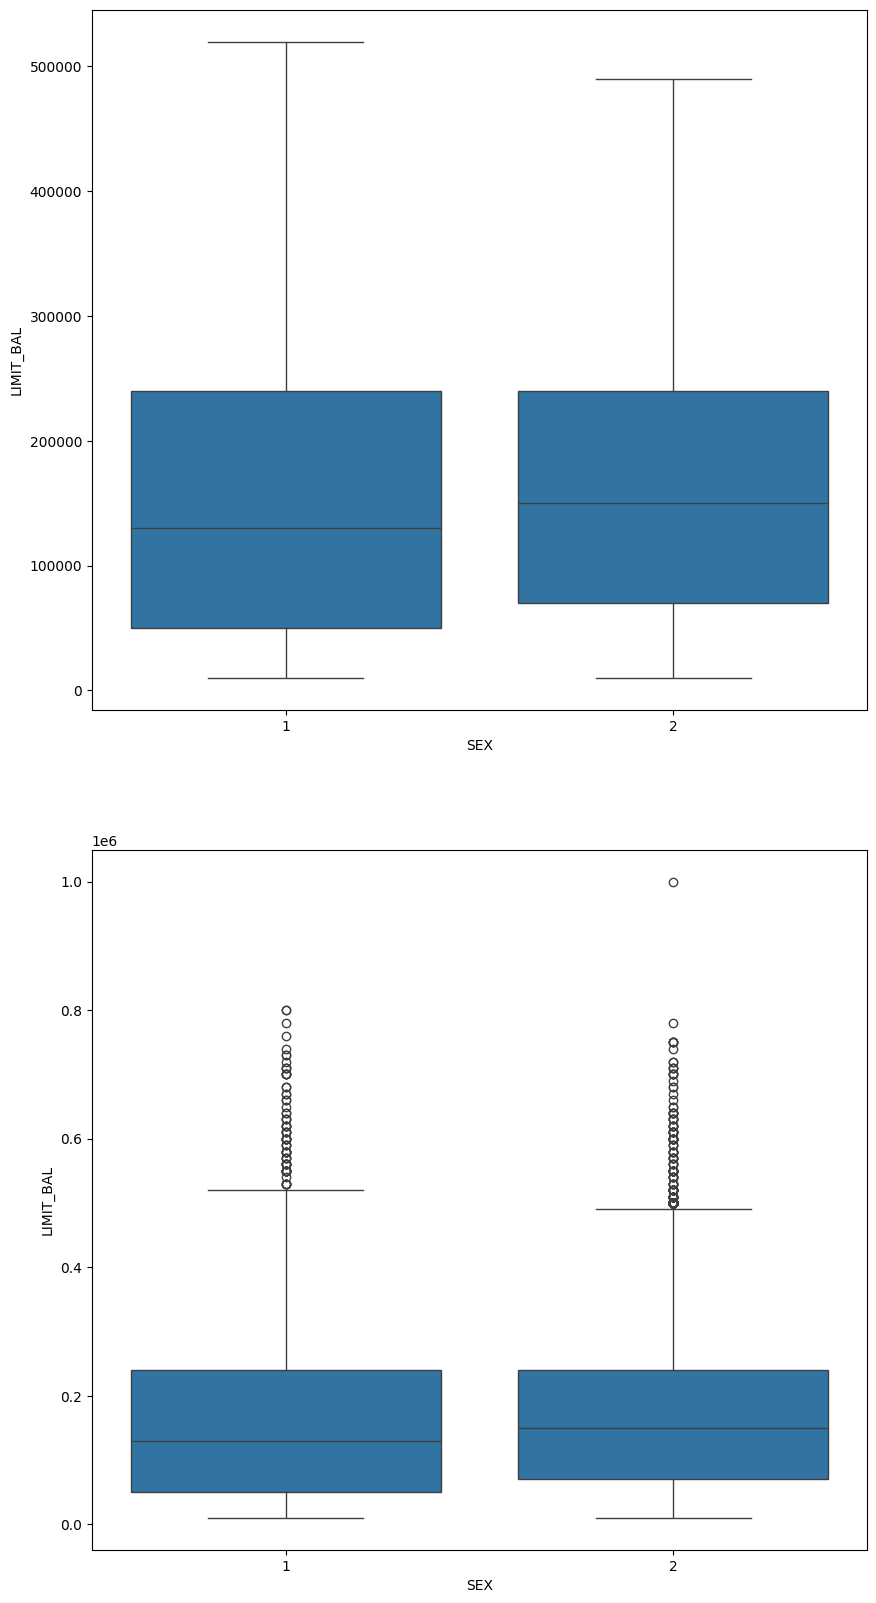

In [ ]:
# Veamos si el género del individuo tiene efecto en el límite del balance

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df)


<Axes: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

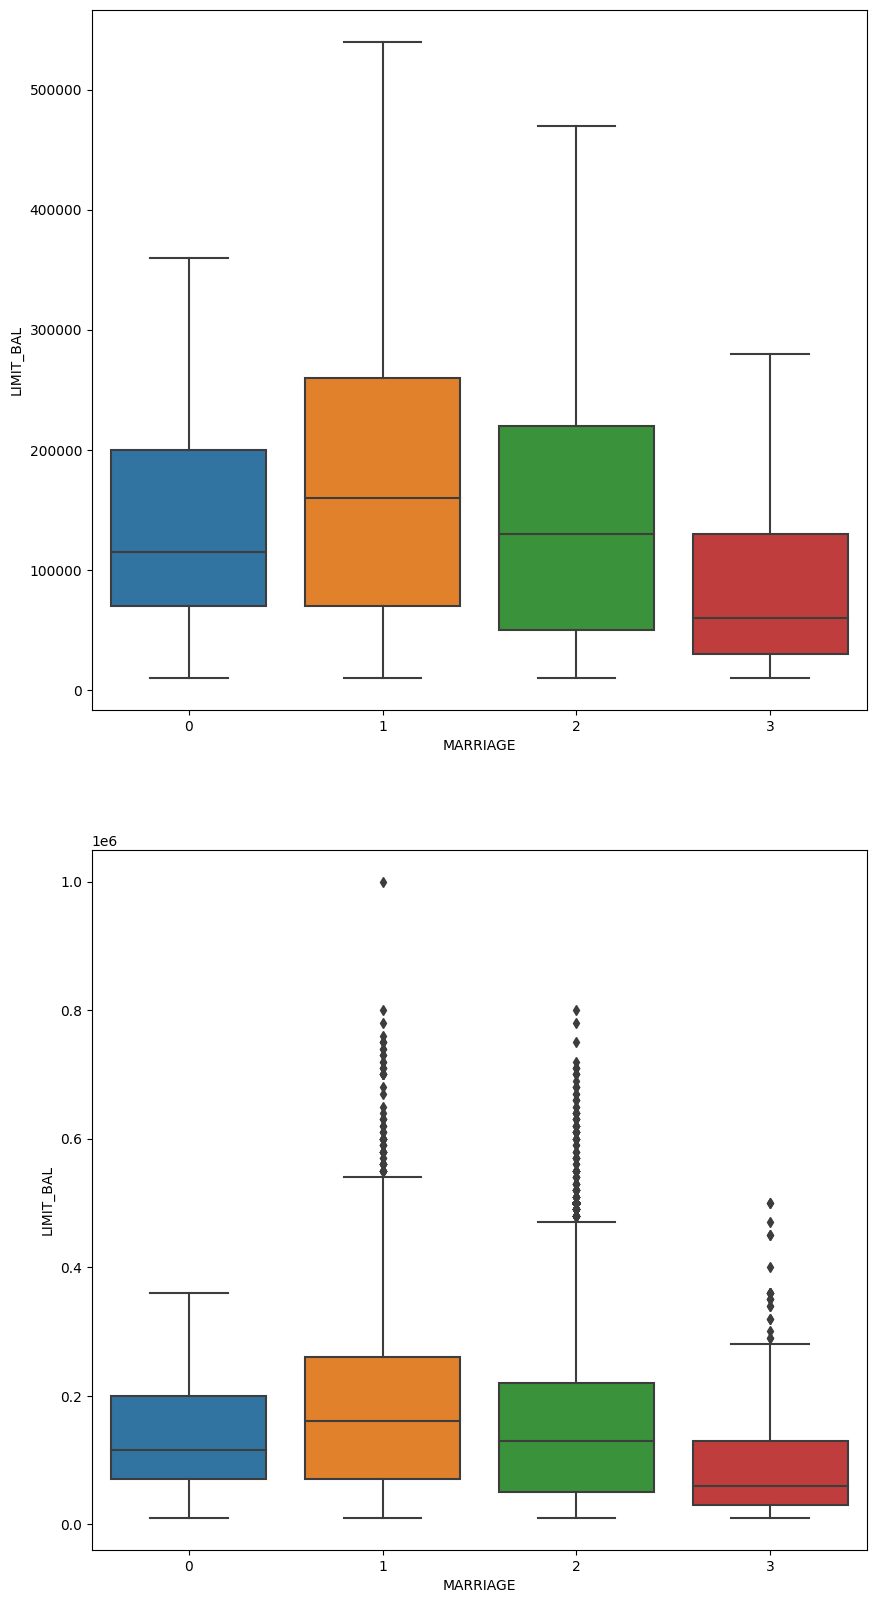

In [ ]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df)


# CREACIÓN DEL CONJUNTO DE DATOS DE PRUEBA Y ENTRENAMIENTO Y REALIZAR UNA LIMPIEZA DE DATOS Y PREPROCESAMIENTO

In [16]:
creditcard_df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

<Axes: xlabel='default.payment.next.month'>

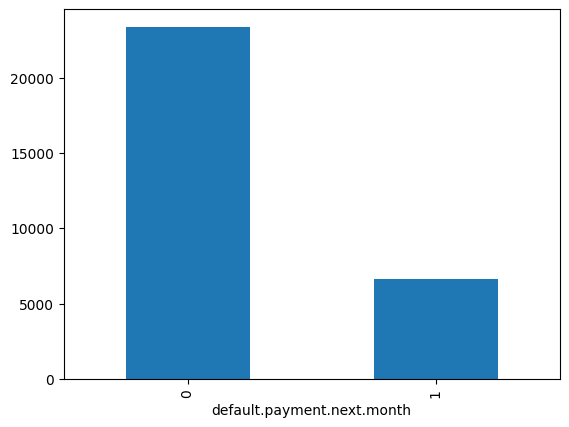

In [17]:
# Nos encontramos frente a un dataset desbalanceado

creditcard_df.groupby('default.payment.next.month')['default.payment.next.month'].count().plot(kind='bar')

Los algoritmos de refuerzo (por ejemplo, AdaBoost, XGBoost , etc.) son ideales para conjuntos de datos desequilibrados porque se le da un mayor peso a la clase minoritaria en cada iteración sucesiva. Durante cada interacción en el entrenamiento, se ajustan los pesos de las clases mal clasificadas.

Fuente: https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38

In [4]:
X_categ = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_categ

SEX  EDUCATION  MARRIAGE
0        2          2         1
1        2          2         2
2        2          2         2
3        2          2         1
4        1          2         1
...    ...        ...       ...
29995    1          3         1
29996    1          3         2
29997    1          2         2
29998    1          3         1
29999    1          2         1

[30000 rows x 3 columns]

In [5]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categ_ar = onehotencoder.fit_transform(X_categ).toarray()

In [6]:
X_categ_ar.shape

(30000, 13)

In [7]:
df_X_categ = pd.DataFrame(X_categ_ar)

In [8]:
df_X_categ

0    1    2    3    4    5    6    7    8    9    10   11   12
0      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
29995  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
29996  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
29997  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
29998  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
29999  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

[30000 rows x 13 columns]

In [9]:
df_X_categ.shape

(30000, 13)

In [10]:
# Notemos que hemos eliminado la variable objetivo 'default.payment.next.month' y solo se toman variables independientes numericas
X_numericals = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numericals

LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0        20000.0   24      2      2     -1     -1     -2     -2     3913.0   
1       120000.0   26     -1      2      0      0      0      2     2682.0   
2        90000.0   34      0      0      0      0      0      0    29239.0   
3        50000.0   37      0      0      0      0      0      0    46990.0   
4        50000.0   57     -1      0     -1      0      0      0     8617.0   
...          ...  ...    ...    ...    ...    ...    ...    ...        ...   
29995   220000.0   39      0      0      0      0      0      0   188948.0   
29996   150000.0   43     -1     -1     -1     -1      0      0     1683.0   
29997    30000.0   37      4      3      2     -1      0      0     3565.0   
29998    80000.0   41      1     -1      0      0      0     -1    -1645.0   
29999    50000.0   46      0      0      0      0      0      0    47929.0   

       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         3102.0      689.0        0.0        0.0        0.0       0.0   
1         1725.0     2682.0     3272.0     3455.0     3261.0       0.0   
2        14027.0    13559.0    14331.0    14948.0    15549.0    1518.0   
3        48233.0    49291.0    28314.0    28959.0    29547.0    2000.0   
4         5670.0    35835.0    20940.0    19146.0    19131.0    2000.0   
...          ...        ...        ...        ...        ...       ...   
29995   192815.0   208365.0    88004.0    31237.0    15980.0    8500.0   
29996     1828.0     3502.0     8979.0     5190.0        0.0    1837.0   
29997     3356.0     2758.0    20878.0    20582.0    19357.0       0.0   
29998    78379.0    76304.0    52774.0    11855.0    48944.0   85900.0   
29999    48905.0    49764.0    36535.0    32428.0    15313.0    2078.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         689.0       0.0       0.0       0.0       0.0  
1        1000.0    1000.0    1000.0       0.0    2000.0  
2        1500.0    1000.0    1000.0    1000.0    5000.0  
3        2019.0    1200.0    1100.0    1069.0    1000.0  
4       36681.0   10000.0    9000.0     689.0     679.0  
...         ...       ...       ...       ...       ...  
29995   20000.0    5003.0    3047.0    5000.0    1000.0  
29996    3526.0    8998.0     129.0       0.0       0.0  
29997       0.0   22000.0    4200.0    2000.0    3100.0  
29998    3409.0    1178.0    1926.0   52964.0    1804.0  
29999    1800.0    1430.0    1000.0    1000.0    1000.0  

[30000 rows x 20 columns]

In [11]:
X_numericals.shape

(30000, 20)

In [12]:
df_X_alls = pd.concat([df_X_categ, X_numericals], axis = 1)


In [13]:
#Actualización para que funcione en 2023
df_X_alls.columns = df_X_alls.columns.astype(str)

In [14]:
# Conjunto de datos de la variable objetivo

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_X_alls)

In [15]:
# Conjunto de datos de la variable dependiente u objetivo

y = creditcard_df['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

# PARTE 2 - MODELAMIENTO: COMPRENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL ALGORITMO XGBOOST

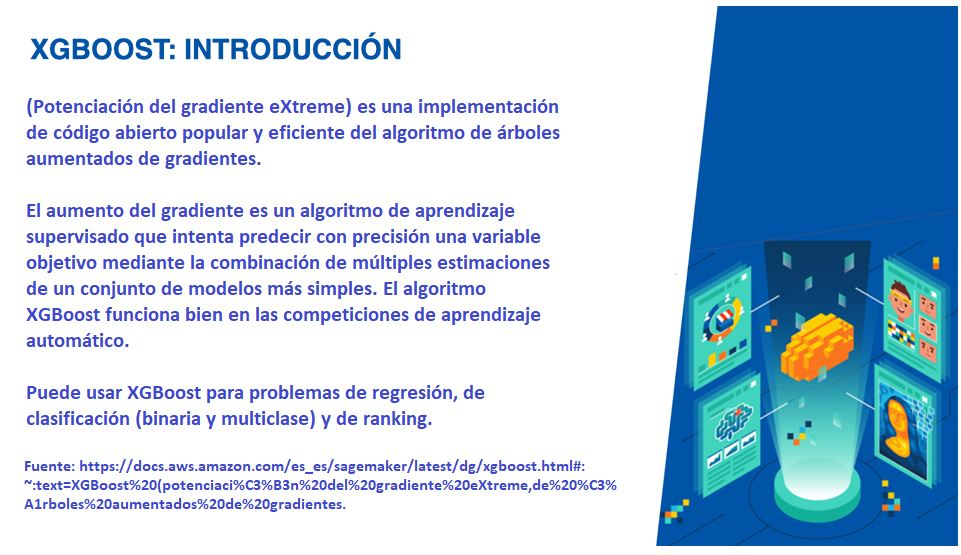

![alt text](https://drive.google.com/uc?id=1UA4N_2XQMJ_sb_sKA62aEl6A6Gmc40sq)

![alt text](https://drive.google.com/uc?id=1fJurCtXKSBDC05syZmY1GMX1BftENy0W)

![alt text](https://drive.google.com/uc?id=1IxMyvn-d6i9c1n7Wg_hZ9jSeJFzXWYWu)

![alt text](https://drive.google.com/uc?id=1kcr-UYQ_ety9lz1weIWKJiMDegttPlwf)

![alt text](https://drive.google.com/uc?id=1A-WqHMt-ZmDT5oVJK00WTfcmBv-WR4aB)

![alt text](https://drive.google.com/uc?id=1IueIFyoM25PmS-N1hAe1HzAlqqSbmEtU)

![alt text](https://drive.google.com/uc?id=1zz35eTLcy2HK8nV0V7ieJ9XMxxKbIZRy)

![alt text](https://drive.google.com/uc?id=1RxL8HrCUJcV7lCwxCuM0q9z_YYoIJDY9)

![alt text](https://drive.google.com/uc?id=1XKa_I1hjaFWStkOOfN1RVD0ePp-q_yCS)

![alt text](https://drive.google.com/uc?id=1Ir0mE2X9sa1T2SnoOj_39x-XHkMsrC2y)

# COMPRENDER LOS PASOS CLAVE DEL ALGORITMO XGBOOST

![alt text](https://drive.google.com/uc?id=1ibBzFnIAUeK6YVI4keoHukQz-u_SNfi3)

![alt text](https://drive.google.com/uc?id=1Ekig0U-A58T0uOJbGON0cgOQIispjd1b)

![alt text](https://drive.google.com/uc?id=15gp04ugAfSC0AZc6PWnS3UVkCSsDVLIf)

![alt text](https://drive.google.com/uc?id=1E4MoNzxfIR_F_AJVGAakrs7AZUpXX4Pc)

![alt text](https://drive.google.com/uc?id=1-8TR_y60VJf2iffyK6IKzZ0ti15WQqGc)

![alt text](https://drive.google.com/uc?id=1sgB0ptlbX2hJckJ006Qdx-zJ1UzTh-K_)

![alt text](https://drive.google.com/uc?id=141Y8b_vvT8VjL106PKWdVj9MGnyYt0p2)

![alt text](https://drive.google.com/uc?id=1HFFnkmGb_kQ_0NJxd2GbVKxfuPrMHzgy)

![alt text](https://drive.google.com/uc?id=1c8c_vESqQW77MeCMR8sSyRZaBofykMal)

![alt text](https://drive.google.com/uc?id=16-WOREgCOeA70F-b1cp1okauKUc9QjMd)

![alt text](https://drive.google.com/uc?id=11Jq_RDiX2gyvUK6eyggoQlVkysa3m6RQ)

# ENTRENAR Y EVALUAR UN CLASIFICADOR XGBOOST

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [24]:
X_test.shape

(7500, 33)

In [78]:
X_train.shape

(22500, 33)

In [17]:
X_test.shape

(7500, 33)

In [ ]:
!pip install xgboost

In [ ]:
# Entrenar un modelo de regresión con XGBoost

import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 82.37333333333333 %


<Axes: >

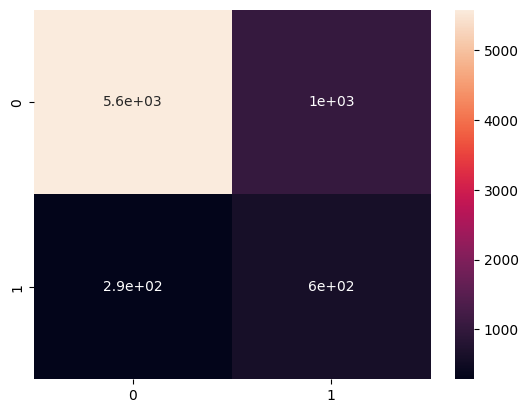

In [ ]:
# Plot Confusion Metric
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5863
           1       0.68      0.37      0.48      1637

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



# OPTIMIZAR LOS HIPERPARÁMETROS de XGBOOST REALIZANDO UN GRID SEARCH

In [ ]:
param_grid = {
        'gamma': [0.5, 1, 5],   # parámetro de regularización
        'subsample': [0.6, 0.8, 1.0], # % de filas que usamos para construir cada árbol
        'colsample_bytree': [0.6, 0.8, 1.0], # % de columnas usadas por cada árbol
        'max_depth': [3, 4, 5] # profundidad de cada árbol
        }

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.798 total time=   0.3s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.797 total time=   0.3s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.799 total time=   0.3s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.795 total time=   0.3s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.799 total time=   0.3s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.799 total time=   0.3s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.797 total time=   0.3s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.800 total time=   0.3s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.796 tot

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=4)

In [ ]:
y_predict_optim = grid.predict(X_test)

In [ ]:
y_predict_optim

array([0, 0, 0, ..., 0, 1, 0])

<Axes: >

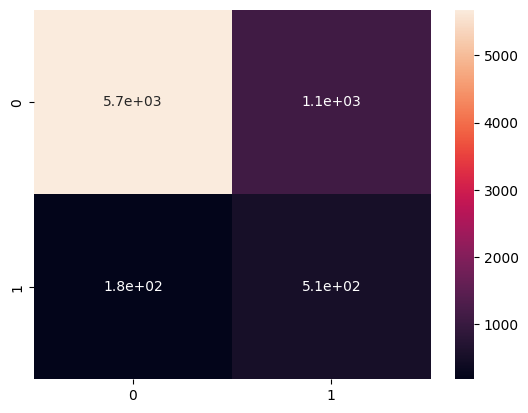

In [ ]:
# Eficacia en el conjunto de test
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_optim))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      5863
           1       0.74      0.31      0.44      1637

    accuracy                           0.83      7500
   macro avg       0.79      0.64      0.67      7500
weighted avg       0.81      0.83      0.80      7500



# **PARTE 3**: SE DESCARGAN LOS CONJUNTOS DE DATOS DE ENTRENAMIENTO Y DE TEST PARA IMPORTARLOS EN AWS SAGEMAKER

In [80]:
y_train

445      0
1712     1
29075    0
11303    1
1968     1
        ..
19017    0
19259    0
13223    0
21518    0
10859    1
Name: default.payment.next.month, Length: 22500, dtype: int64

In [81]:
train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [82]:
train_data.head()

Target    0    1    2    3    4    5    6    7    8  ...        23  \
445         0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.102406   
1712        1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.174150   
29075       0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.125986   
11303       1  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.087856   
1968        1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.105710   

             24        25        26        27        28        29        30  \
445    0.183570  0.100806  0.272969  0.001832  0.000891  0.001228  0.001610   
1712   0.313470  0.253894  0.398269  0.000000  0.004750  0.007812  0.024155   
29075  0.347790  0.258426  0.268494  0.221347  0.042960  0.222322  0.000662   
11303  0.160412  0.081225  0.261202  0.001216  0.000594  0.000000  0.000937   
1968   0.194036  0.117242  0.289905  0.000000  0.001187  0.001451  0.002415   

             31        32  
445    0.001407  0.000946  
1712   0.016412  0.000000  
29075  0.000000  0.239741  
11303  0.000000  0.005073  
1968   0.003517  0.002981  

[5 rows x 34 columns]

In [85]:
y_test

5056     1
414      0
20765    0
15184    0
17515    0
        ..
9321     0
3322     0
14973    1
14305    0
2664     1
Name: default.payment.next.month, Length: 7500, dtype: int64

In [83]:
val_data = pd.DataFrame({'Target':y_test})
for i in range(X_test.shape[1]):
    val_data[i] = X_test[:,i]

In [84]:
val_data.head()

Target    0    1    2    3    4    5    6    7    8  ...        23  \
5056        1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.121449   
414         0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.196131   
20765       0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.108380   
15184       0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.095448   
17515       0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.123766   

             24        25        26        27        28        29        30  \
5056   0.223524  0.148635  0.314606  0.003320  0.000089  0.005580  0.004026   
414    0.168647  0.099856  0.278341  0.030604  0.118736  0.010081  0.031193   
20765  0.175929  0.095735  0.273838  0.002152  0.000771  0.003356  0.002335   
15184  0.177438  0.099256  0.275060  0.003257  0.000000  0.002307  0.001610   
17515  0.225331  0.134864  0.306781  0.032053  0.002078  0.003348  0.004831   

             31        32  
5056   0.005861  0.005675  
414    0.052969  0.003783  
20765  0.007034  0.005675  
15184  0.000000  0.003148  
17515  0.023445  0.006620  

[5 rows x 34 columns]

In [86]:
# Se Descargan los archivos de Entrenamiento y de Test o Validacion

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [20]:
val_xtest = pd.DataFrame(X_test)

In [21]:
val_xtest.shape

(7500, 33)

In [22]:
# Se Descargan archivo de Test solo de variables independientes

val_xtest.to_csv('xvalidacion.csv', header = False, index = False)
